In [101]:
import numpy as np
import pandas as pd
!pip install --force-reinstall scipy==1.8.0

ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy==1.8.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0r

In [2]:
# df = pd.read_csv('spam.csv', encoding='utf-8')
df = pd.read_csv('spam_ham_dataset.csv', encoding='utf-8')

In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
601,2482,ham,"Subject: hpl nom for january 30 , 2001\r\n( se...",0
4931,4612,spam,Subject: re : pretty boy wants to meet his sou...,1
860,1179,ham,"Subject: re : meter 1459 , 6 / 00\r\nyep , you...",0
2274,3336,ham,Subject: re : tenaska iv - cleburne plant\r\nd...,0
4591,2866,ham,"Subject: spot deals - april , 2001\r\nthe foll...",0


In [4]:
df.shape

(5171, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


## 1. Data Cleaning

In [6]:
df.drop(columns= ['Unnamed: 0' , 'label_num'] , inplace=True)

In [7]:
df.sample(5)

,label,text
3120,ham,"Subject: re : preliminary "" buyback & deficien..."
2849,ham,Subject: re : gas message board\r\nthe problem...
1357,ham,Subject: office administrator needed\r\nplease...
4337,ham,"Subject: deal number\r\ndarren ,\r\ni understa..."
3589,spam,Subject: open immediately for smart s - p - a ...


In [8]:
df.rename(columns={'label':'target'}, inplace=True)

In [9]:
df.sample(5)

,target,text
503,ham,Subject: hpl nomination for january 15 thru 17...
4381,ham,Subject: txu noms . for 10 / 14 - 16 / 00\r\na...
956,ham,Subject: re : cornhusker\r\ntenaska iv has bee...
1210,spam,"Subject: check it out\r\nhello ,\r\nif you wan..."
4081,spam,Subject: \r\n


In [10]:
!pip install jedi ipython

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
266,1,"Subject: urgent assistance\r\ngood day ,\r\ni ..."
2664,0,Subject: enron / hpl actuals for january 12 - ...
1848,1,Subject: anderson\r\njeromy\r\n
820,0,"Subject: deals 141877 , 141883 , and 141884 ( ..."
3888,1,Subject: bro - im finished\r\nunbelievably che...


In [14]:
df.duplicated().sum()

178

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(4993, 2)

In [18]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [19]:
df['target'].value_counts()

target
0    3531
1    1462
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x167d148f010>,
 [Text(-0.6664987604061641, 0.8750882254818922, 'ham'),
  Text(0.6664986784744886, -0.8750882878840056, 'spam')],
 [Text(-0.3635447784033622, 0.4773208502628502, '70.72'),
  Text(0.36354473371335744, -0.4773208843003666, '29.28')])

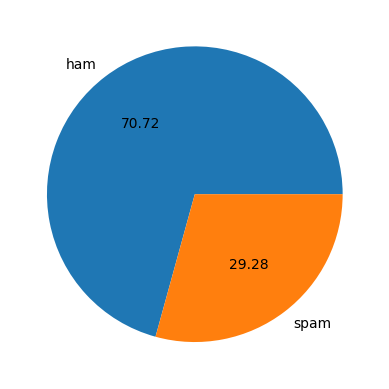

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')

In [21]:
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
1391,0,Subject: mtbe upset\r\nthe mtbe plant had an u...,197
2482,0,"Subject: re : meter 9707\r\ndaren ,\r\nfyi .\r...",1193
550,1,Subject: appeal - democrat daily - inspection ...,383
2014,0,Subject: enron / hpl actuals for sept . 8 - 10...,329
3353,0,Subject: fw : [ fwd : fw : drawing by a school...,1705


In [22]:
!pip install nltk

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D4rkDemian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.sample(5)

,target,text,num_characters,num_words
3223,0,Subject: re : pg & e texoma volumes\r\nfyi\r\n...,4659,1121
4858,0,"Subject: re : deal 156071 feb 00\r\ndaren , i ...",1347,323
4561,1,Subject: today is a day to remember\r\ncongrad...,590,117
2776,0,"Subject: cleburne issues\r\ndaren , with megan...",1545,327
1150,0,Subject: october 2000 co - owner avails .\r\ni...,858,253


In [26]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2571,1,Subject: re : where the investigation was\r\nt...,323,73,5
1861,1,Subject: dear customer your details have been ...,1208,238,20
2240,0,Subject: southern union - 03 / 01 prod - austi...,1082,294,16
1081,0,"Subject: enron / hpl actuals for august 14 , 2...",153,40,4
4762,0,Subject: lst rev dec . 1999 josey ranch nom\r\...,1099,281,7


In [28]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [29]:
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [30]:
import seaborn as sns

C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D4rkDemian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<Axes: xlabel='num_characters', ylabel='Count'>

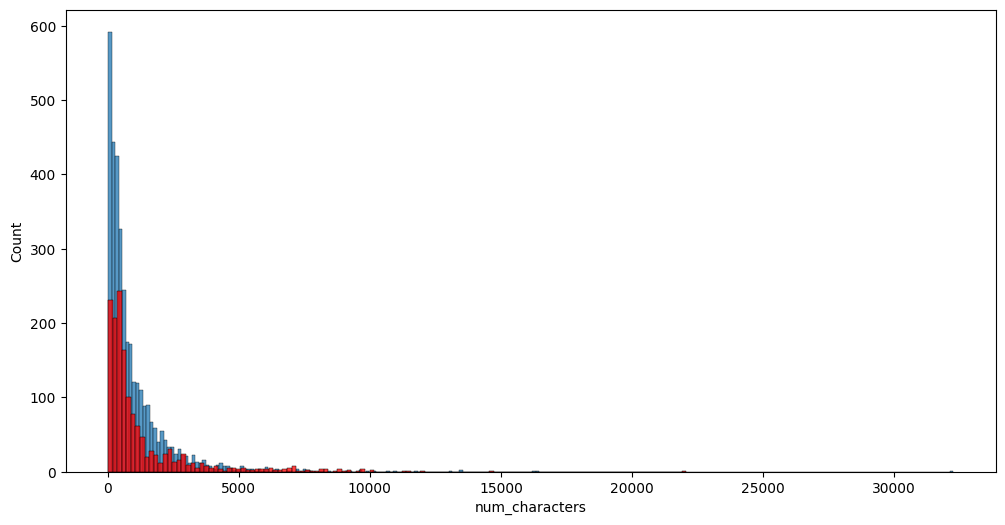

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'] , color="red")

## 2. Data Preprocessing 
 - Lower Case
 - Tokenization
 - Removing special characters
 - Removing stopwords and punctuations
 - Stemming

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
def transform_text(text):
    text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
transform_text('Hi how are you?%10 Hitesh.I love YT videos on Machine Learning and dancing, what about you?')

'hi 10 love yt video machin learn danc'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500, min_font_size=10, background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

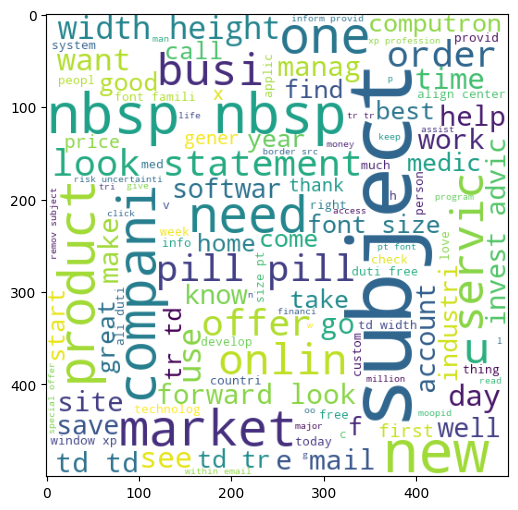

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

## 3. Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X

array([[0.11212774, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.12398632, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
X.shape

(4993, 42592)

In [47]:
y = df['target'].values

In [48]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.svm import SVC
svc = SVC(kernel='poly' , gamma=1.0)

In [86]:
# from sklearn.naive_bayes import MultinomialNB
# # Defining our model
# clf = MultinomialNB()

In [87]:
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test , y_pred)
# precision = precision_score(y_test , y_pred)
# print('Accuracy score for MultinomialNB: ' , accuracy)
# print('Precision score for MultinomialNB: ' , precision)

In [88]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)

In [89]:
print('Accuracy Score: ' , accuracy)
print('Prediction Score: ' , precision)

Accuracy Score:  0.7987987987987988
Prediction Score:  1.0


In [91]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(svc , open('model.pkl' , 'wb'))